In [59]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.preprocessing import normalize

In [3]:
def create_sine(
    steps,
    length=1,
    vertical_shift=1,
    amplitude=1,
    cycles=2
):
    t = np.arange(0.0, length, steps)
    s = vertical_shift*amplitude + np.sin(cycles * np.pi * t)
    return s

In [10]:

def add_noise_to(v, noise_amplitude):
    noise = np.random.rand(1, len(v))
    t = np.ones(len(v))
    a_t = np.dot(noise_amplitude, t)
    n_a = noise ** a_t
    return np.add(v, n_a)[0]

[-1, 0, -1, 0, -1, -1, -2, -2, -3, -4, -4, -3, -3, -4, -5, -6, -7, -8, -8, -7, -7, -7, -6, -7, -8, -7, -8, -9, -10, -10, -10, -11, -12, -12, -11, -12, -12, -12, -11, -10, -9, -10, -10, -9, -9, -10, -10, -9, -9, -9, -8, -7, -6, -7, -6, -5, -5, -6, -6, -5, -4, -3, -4, -4, -3, -3, -2, -1, 0, -1, -2, -3, -4, -4, -4, -5, -6, -5, -5, -4, -5, -4, -4, -3, -4, -4, -5, -4, -5, -5, -4, -4, -5, -6, -6, -5, -5, -4, -5, -4, -4, -3, -2, -3, -4, -3, -2, -2, -3, -3, -3, -3, -2, -3, -3, -4, -4, -4, -3, -3, -4, -4, -5, -5, -5, -5, -6, -7, -8, -9, -8, -9, -8, -7, -7, -7, -8, -9, -8, -9, -8, -9, -10, -10, -9, -8, -9, -8, -9, -9, -10, -10, -10, -11, -11, -11, -11, -12, -12, -12, -12, -13, -13, -14, -14, -14, -14, -13, -12, -11, -11, -10, -11, -12, -13, -13, -14, -15, -15, -15, -14, -15, -15, -16, -16, -16, -17, -17, -18, -17, -16, -15, -16, -16, -17, -17, -16, -15, -16, -15, -16, -15, -16, -17, -18, -18, -18, -19, -18, -17, -16, -15, -16, -15, -15, -16, -17, -16, -17, -18, -18, -17, -18, -18, -18, -18, -17,

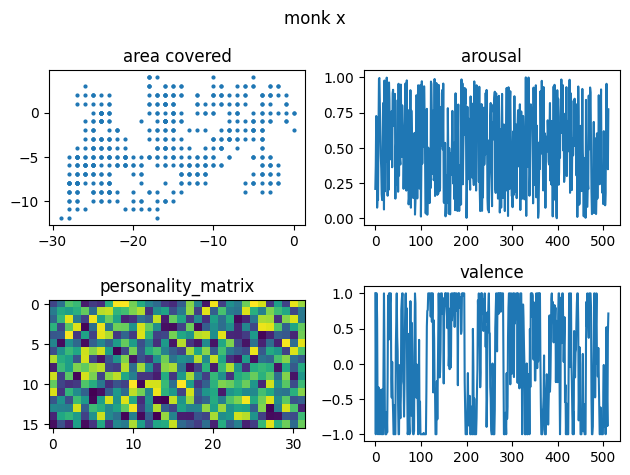

In [333]:
tau = 1000

# Position.
X = []
Y = []
t_a = 0
t_b = 0

# Arousal.
R = []
t_r = 0


# Valence.
V = [1,-1]
t_v = 0


for t in range(0, tau):
    t_a += random.randint(-1, 1)
    t_b += random.randint(-1, 1)
    X.append(t_a)
    Y.append(t_b)

    
    t_r = random.random()
    roll = random.randint(0,100)
    if roll >= 50:
        t_v += random.uniform(-1.0, 1.0) - min(V) / (max(V) - min(V)) 
    else:
        t_v -= random.uniform(-1.0, 1.0) - min(V) / (max(V) - min(V)) 
    if t_v >= 1.0:
        t_v = 1.0
    elif t_v <= -1.0:
        t_v = -1.0
    
    R.append(t_r)
    V.append(t_v)

print(X)
print(Y)

x_ = np.append(R, V)

monk_memory = 512

fig, axs = plt.subplots(2, 2)
fig.suptitle('monk x')
axs[0,0].scatter(X[:monk_memory],Y[:monk_memory],s=4)
axs[0,0].set_title('area covered')
axs[0,1].plot(np.arange(0, len(R[:monk_memory])), R[:monk_memory])
axs[0,1].set_title('arousal')
axs[1,1].plot(np.arange(0, len(V[:monk_memory])), V[:monk_memory])
axs[1,1].set_title('valence')
axs[1,0].set_title('personality_matrix')

axs[1,0].imshow(x_[:monk_memory].reshape(16,32))

plt.tight_layout()
plt.show()